<a href="https://colab.research.google.com/github/diagonal-hamiltonian/Qubit_Feedback-Stabilisation_and_Quantum_Trajectories/blob/main/Feedback_Stabilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qubit Feedback-Stabilisation and Quantum Trajectories  
## Computational project on feedback-stabilization of an arbitrary pure state of a two-level atom - Jin Wang and H. M. Wiseman Phys.	Rev.	A 64,	063810 (2001). 


In [1]:
#@title
# Importing libraries and defing useful things
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from scipy.linalg import expm
plt.rcParams.update({'font.size': 17})

The central idea of this paper is to use a continuous measurement record, whose existence is due to the coupling of the system to a bath, to control the dynamics of the system so as to counteract the noise introduced by that bath and possibly other baths.

##### Experimental setup diagram

Here is the experimental setup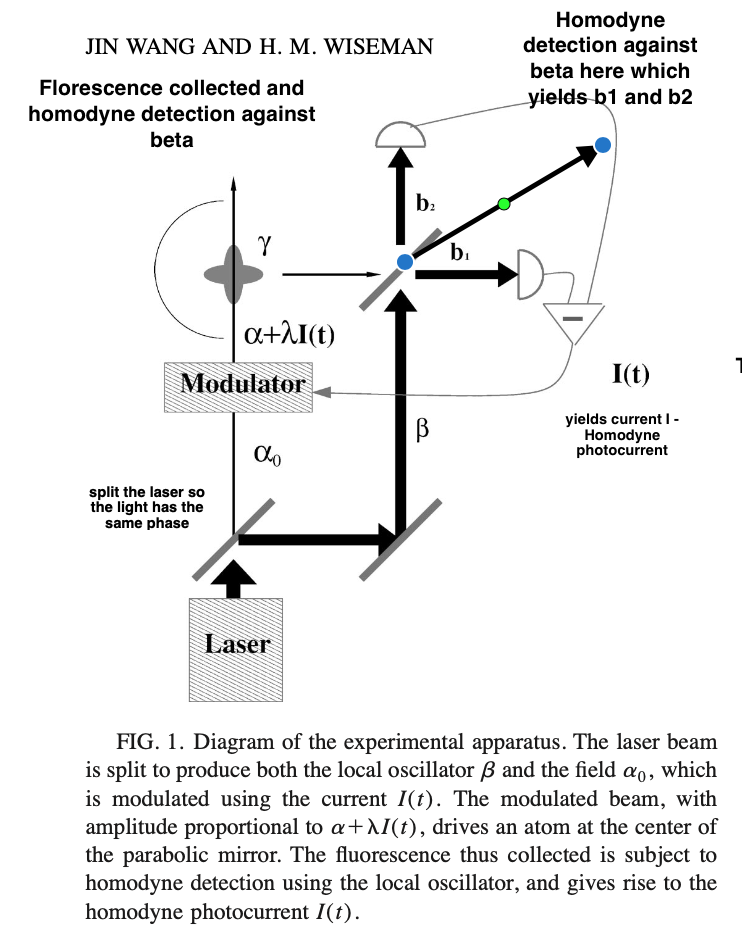

### Master equation

Consider atom with 2 levels {$\left| g\right \rangle,\left| e\right \rangle$} and lowering operator $\sigma=|g\rangle\langle e|$, Rabi Frequency 2$\alpha$.  The master equation describing the probaility of the system at later times is (setting $\lambda$ to 0)

\begin{equation}
\dot{\rho}=\gamma \mathcal{D}[\sigma] \rho-i \alpha\left[\sigma_{y}, \rho\right]
\end{equation}

where $\mathcal{D}[A] B \equiv A B A^{\dagger}-\left\{A^{\dagger} A, B\right\} / 2$ is a superoperator. This equation can be derived from the Linbladian: 
$$\dot{\rho}=-\frac{i}{\hbar}[H, \rho]+\sum_{n, m=1}^{N^{2}-1} h_{n m}\left(A_{n} \rho A_{m}^{\dagger}-\frac{1}{2}\left\{A_{m}^{\dagger} A_{n}, \rho\right\}\right).$$

The state of the atom in bloch space can be described by (x,y,z) and is related to the density matrix by 
$$
\rho=\frac{1}{2}\left(I+x \sigma_{x}+y \sigma_{y}+z \sigma_{z}\right)
$$
The stationary state solution (ie: $\rho = 0$) for (x,y,z) is given by 
$$
\begin{gathered}
x_{\mathrm{ss}}=\frac{-4 \alpha \gamma}{\gamma^{2}+8 \alpha^{2}} \\
y_{\mathrm{ss}}=0 \\
z_{\mathrm{ss}}=\frac{-\gamma^{2}}{\gamma^{2}+8 \alpha^{2}}
\end{gathered}
$$


With Purtiy
$$
Tr(\rho^2) = r^2 = x_{ss}^2+z_{ss}^2
$$
These solutions form an ellipse in when we consider an x-z slice of bloch space

Below is the locus of the solutions to the above stationary state (SS) Bloch equations. The ellipse in the lower-half plane is the locus for the equations with driving only. 

The stationary states we can reach by driving the atom are limited, and generally far from pure.

In [2]:
#@title
# Functions returning stationary solutions (Eq. 2.3,2.5)
def xss(Gamma, Theta, Alpha): 
  return -4*Alpha*Gamma/(Gamma**2 + 8*Alpha**2)
def zss(Gamma, Theta, Alpha): 
  return -Gamma**2/(Gamma**2 + 8*(Alpha)**2)
# Driving strenght (Modulated beam amplitude)
def alpha(Gamma, Theta): 
# Handy to parameterise alpha as a tan(Theta) to range from 0 -> inf
  return np.tan(Theta)/(4*Gamma)

def purity(Gamma, Theta, Alpha): 
  # Purity (Eq. 2.8)
  X = xss(Gamma, Theta, Alpha)
  Z = zss(Gamma, Theta, Alpha)
  return X**2 + Z**2

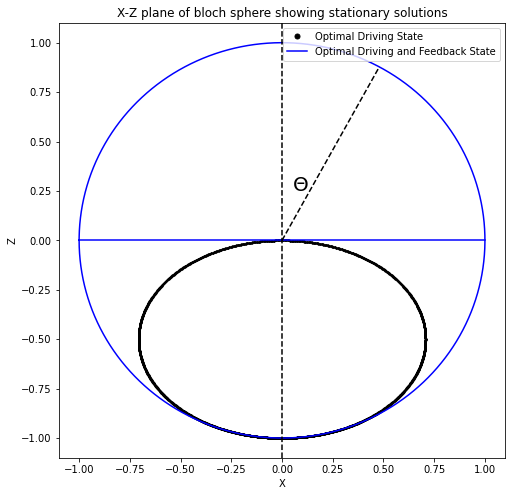

In [7]:
# initialising variables
Gamma = 1. # Using units where gamma = 1
theta_range = np.arange(-np.pi, np.pi, np.pi/2000)
Alpha = alpha(Gamma, theta_range)
x = xss(Gamma,theta_range,Alpha)
z = zss(Gamma,theta_range,Alpha)
r = (purity(Gamma, theta_range, Alpha))**.5

# Plotting Slice of Bloch sphere
plt.figure(figsize=(8,8))
plt.plot(x, z, 'ko', markersize = 1,label ='Optimal Driving State' )
plt.plot(np.cos(theta_range), np.sin(theta_range), label = 'Optimal Driving and Feedback State', c='b');
plt.plot([-1,1],[0,0],'b') 
plt.axvline(x=0, color = 'k', linestyle = '--' )
plt.plot([0,np.cos(np.pi/2-0.5)], [0,np.sin(np.pi/2-0.5)], 'k--'); 
plt.text(.05,.25,'$\Theta$', fontdict={'size':20})
plt.xlim([-1.1,1.1]); plt.ylim([-1.1,1.1])
plt.legend(loc='upper right', markerscale = 5);plt.xlabel('X'); plt.ylabel('Z')
plt.title('X-Z plane of bloch sphere showing stationary solutions'); plt.show()

*Locus of the solutions to the Bloch equations. The ellipse in the lower-half plane is the locus for the equations with driving only. The full circle minus the points on the equator is the locus for the equations with optimal driving and feedback, as defined in the next section.*

### FEEDBACK WITH UNIT-EFFICIENCY DETECTION $\eta = 1$

Solving the Stocastic Shrodinger Equation under a feedback Hamiltonian $H_{fb}=\lambda \sigma_y I(t)$, where $I(t)=\alpha + \lambda I(t)$ for optimal values of feedback parameter, $\lambda$, and driving parameter, $α$, (that is parameters which keep the state in $\theta$ with maximum purity) we get 

$$
\lambda=-\frac{\sqrt{\gamma}}{2}(1+\cos \theta),
$$

$$
\alpha=\frac{\gamma}{4} \sin \theta \cos \theta.
$$


In [8]:
#@title
# Optimum feedback and driving parameters for unit detection efficency
def lambda_opt_unit(Gamma, Theta):
  return -Gamma**.5/2*(1+np.cos(Theta))
def alpha_opt_unit(Gamma, Theta):
  return Gamma/4.*(np.cos(Theta)*np.sin(Theta))
# Functions returning stationary solutions (Eq. 2.3,2.5)
def xss(Gamma, Theta, Alpha): 
  return -4*Alpha*Gamma/(Gamma**2 + 8*Alpha**2)
def zss(Gamma, Theta, Alpha): 
  return -Gamma**2/(Gamma**2 + 8*Alpha**2)

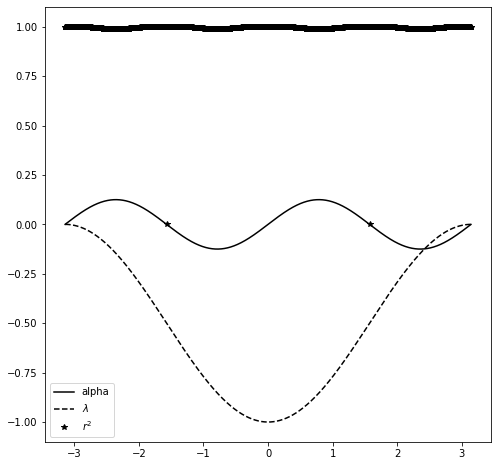

In [9]:
Gamma = 1. # Using units where gamma = 1
theta_range = np.arange(-np.pi, np.pi, np.pi/2000)
Lambda = lambda_opt_unit(Gamma, theta_range)
Alpha  = alpha_opt_unit(Gamma, theta_range)
x      = xss(Gamma, theta_range, Alpha)
z      = zss(Gamma, theta_range, Alpha)
Purity = purity(Gamma, theta_range, Alpha)

plt.figure(figsize=(8,8))
plt.plot(theta_range, Alpha, 'k', label='alpha')
plt.plot(theta_range, Lambda, 'k--', label = '$\lambda$')
plt.plot([-np.pi/2,np.pi/2], [0,0],  'k*')
plt.plot(theta_range, Purity, 'k*', label = '$r^2$')
plt.legend()
plt.show()

*Plot of the optimal driving ($\alpha$, solid) and feedback ($\lambda$, dashed) required to produce a pure state with Bloch angle $\theta$. For this plot we have set $\gamma = 1$ so that $\alpha$ and $\lambda$ are dimensionless. The purity ($r^2$, starred) is one except for $\pm\pi/2$, where the feedback is not stable.*

###FEEDBACK WITH NONUNIT-EFFICIENCY $\eta\neq0 $

Functions defined by Eqs. 4.7, 4.5, 4.6 and 4.8 are below.


In [11]:
#@title
# Functions defined by Eqs. 4.7, 4.5, 4.6 and 4.8
def alpha(Gamma, Lambda, Eta, Theta): 
  n = np.tan(Theta)*np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda + 4*Lambda**2)
  d = 4*Eta**2*(Gamma + 2*Gamma**.5*Lambda)
  return n/d

def D(Gamma, Lambda, Eta, Theta): 
  s1 = Gamma**2*Eta**2 
  s2 = 6*Gamma**(1.5)*Eta**2*Lambda
  s3 = 2*Gamma*Eta*(3 + 4*Eta)*Lambda**2
  s4 = 16*np.sqrt(Gamma)*Eta*Lambda**3
  s5 = 8*( (alpha(Gamma, Lambda, Eta, Theta))**2*Eta**2 + Lambda**4)
  return s1+s2+s3+s4+s5

def xss(Gamma, Lambda, Eta, Theta): 
  n = -4*alpha(Gamma, Lambda, Eta, Theta)*Eta**2*(Gamma + 2*np.sqrt(Gamma)*Lambda)
  d = D(Gamma, Lambda, Eta, Theta)
  return n/d
        
def zss(Gamma, Lambda, Eta, Theta): 
  n = -np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda +4*Lambda**2)
  d = D(Gamma, Lambda, Eta, Theta)
  return n/d

def purity(Gamma, Lambda, Eta, Theta): 
  return xss(Gamma, Lambda, Eta, Theta)**2+zss(Gamma, Lambda, Eta, Theta)**2

def lambda_opt(Gamma, Eta, Theta, lambda_range = np.arange(-1,1,.01) ):
  ''' 
  This function finds the optimum feedback value in lambda_range.
  This corrosponds to maximising the purity wrt lambda. There is
  need to split the search into the upper (-pi/2<theta<pi/2) and 
  lower halves as the top solutions are missing if that step is 
  missed.
  '''

  # Handling the expetion theta=float
  Theta = np.array([Theta]) if type(Theta) == float else Theta
  # Array to store optimal lambda for each theta
  Lambdas = np.zeros_like(Theta) 

  # Looping over theta
  for i, theta in enumerate(Theta):
    # Solutions X and Z over a range of Lambda for single theta value
    X = xss(Gamma, lambda_range, Eta, theta) 
    Z = zss(Gamma, lambda_range, Eta, theta) 

    # Considering Z>0 (Upper half bloch sphere)
    if (-np.pi/2 < theta and theta <= np.pi/2): 
      # Return lambda which maximises the purity
      Z_up = np.array([z if z>0 else 0 for z in Z ])
      X_up = np.array([X[i] if z>0 else 0 for i, z in enumerate(Z)])
      Lambdas[i] = lambda_range[ np.argmax(X_up**2+Z_up**2) ] 

    # Considering Z<0 (Lower half)
    else:
      Lambdas[i] = lambda_range[ np.argmax(X**2+Z**2) ] 
  return Lambdas

Below is Fig 2 as in the paper.

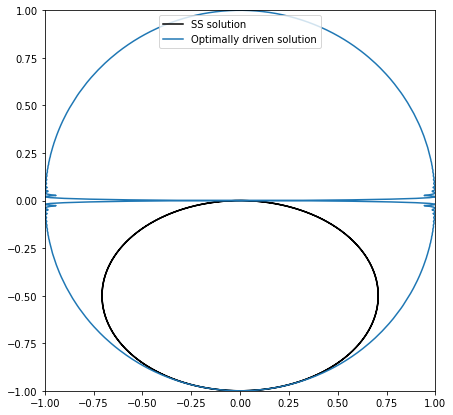

In [12]:
Eta    = 1-1e-10
Theta  = np.arange(-np.pi,np.pi,np.pi/1000)
Lambda = lambda_opt(Gamma, Eta, Theta)
R      = purity(Gamma, Lambda , Eta, Theta)**.5
x, z   = xss(Gamma, Lambda, Eta, Theta), zss(Gamma, Lambda, Eta, Theta)

plt.figure(figsize=(7,7))
plt.plot(xss(Gamma, Lambda= 0, Eta = 1., Theta=theta_range), 
         zss(Gamma, Lambda= 0, Eta = 1., Theta=theta_range), 'k',label ='SS solution' )
plt.plot(x,z, label= 'Optimally driven solution')
plt.ylim([-1,1])
plt.xlim([-1,1])  
plt.legend()
plt.show()

Below is the locus of the solutions to the Bloch equations with optimal feedback for different values of detector efficiency.

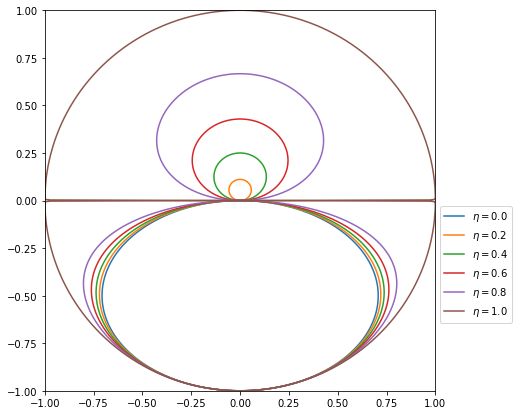

In [ ]:
Eta = [1e-10+.2*i for i in range(5)]
Eta.append(1-1e-10)
Theta  = np.arange(-np.pi,np.pi,np.pi/1000)

plt.figure(figsize=(7,7))
for eta in Eta:
  Lambda = lambda_opt(Gamma, eta, Theta)
  x, z = xss(Gamma, Lambda, eta, Theta),zss(Gamma, Lambda, eta, Theta)
  plt.plot(x, z, label= '$\eta=%f$'+str(np.round(eta,2)))

plt.ylim([-1,1])
plt.xlim([-1,1])  
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Plot of the optimal driving ($\alpha$) and feedback $\lambda$ (obtained by maximizing $r^2(\lambda)=x^2
(\lambda)+y^2(\lambda)$ )  required to produce the most pure state with Bloch angle $\theta$. For this plot we have set $\gamma= 1$. The purity obtained is also plotted

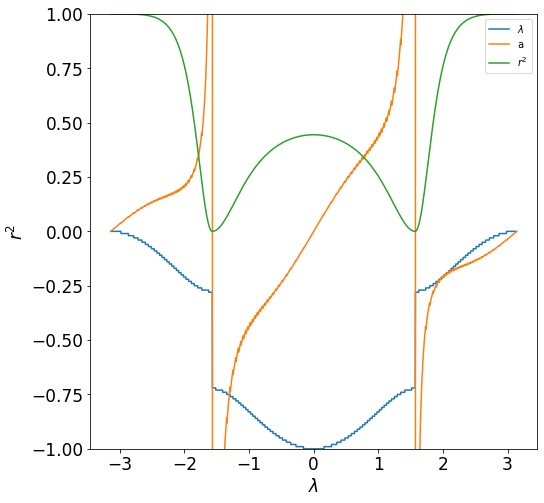

In [ ]:
Eta   = .8
Gamma = 1.
Lambda = lamb_opt(Gamma, Eta, Theta)

plt.figure(figsize=(8,8))
plt.plot(Theta, Lambda, label = '$\lambda $')
plt.plot(Theta, alpha(Gamma, Lambda, Eta, Theta),label = 'a')
plt.plot(Theta, purity(Gamma, Lambda, Eta, Theta),label = '$r^2$')
plt.legend( fontsize=10);
plt.xlabel('$\lambda$'); plt.ylabel('$r^2$')
plt.ylim([-1,1]); plt.show()

## Stochastic Dynamical Evolution

The state of the qubit evolves according to the Stochastic Master Equation

$$
\left(\begin{array}{c}
d x_{\mathrm{c}} \\
d y_{\mathrm{c}} \\
d z_{\mathrm{c}}
\end{array}\right)=d t\left(\begin{array}{ccc}
-\gamma / 2-2 \kappa & 0 & 2 \alpha \\
0 & -\gamma / 2 & 0 \\
-2 \alpha & 0 & -\gamma-2 \kappa
\end{array}\right)\left(\begin{array}{l}
x_{\mathrm{c}} \\
y_{\mathrm{c}} \\
z_{\mathrm{c}}
\end{array}\right)-d t\left(\begin{array}{c}
0 \\
0 \\
2 \lambda \sqrt{\gamma}+\gamma
\end{array}\right)+dW(t)\left(\begin{array}{c}
-\sqrt{\gamma \eta} x_{\mathrm{c}}^{2}+(\sqrt{\gamma \eta}+2 \lambda / \sqrt{\eta}) z_{\mathrm{c}}+\sqrt{\gamma \eta} \\
-\sqrt{\gamma \eta} x_{\mathrm{c}} y_{\mathrm{c}} \\
-(\sqrt{\gamma \eta}+2 \lambda / \sqrt{\eta}) x_{\mathrm{c}}-\sqrt{\gamma \eta} x_{\mathrm{c}} z_{\mathrm{c}}
\end{array}\right),\\
$$


$$
W(t)=\sqrt{dt}\zeta(t)\\
$$
where $\zeta(t)$ is a random gaussian variable. The SBE generates a single-quantum trajectory that represents the actual evolution of a system undergoing continuous measurement of its environment

### Unit efficency

In [13]:
#@title

####################################
# STEADY STATE SOLUTION PARAMETERS #
####################################
def D(Gamma, Lambda, Eta, Theta): 
  s1 = Gamma**2*Eta**2 
  s2 = 6*Gamma**(1.5)*Eta**2*Lambda
  s3 = 2*Gamma*Eta*(3 + 4*Eta)*Lambda**2
  s4 = 16*np.sqrt(Gamma)*Eta*Lambda**3
  s5 = 8*( (alpha(Gamma, Lambda, Eta, Theta))**2*Eta**2 + Lambda**4)
  return s1+s2+s3+s4+s5

def alpha(Gamma, Lambda, Eta, Theta): 
  n = np.tan(Theta)*np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda + 4*Lambda**2)
  d = 4*Eta**2*(Gamma + 2*Gamma**.5*Lambda)
  return n/d

def xss(Gamma, Lambda, Eta, Theta): 
  n = -4*alpha(Gamma, Lambda, Eta, Theta)*Eta**2*(Gamma + 2*np.sqrt(Gamma)*Lambda)
  d = D(Gamma, Lambda, Eta, Theta)
  return n/d

def zss(Gamma, Lambda, Eta, Theta): 
  n = -np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda +4*Lambda**2)
  d = D(Gamma, Lambda, Eta, Theta)
  return n/d

def purity(Gamma, Lambda, Eta, Theta): 
  return xss(Gamma, Lambda, Eta, Theta)**2+zss(Gamma, Lambda, Eta, Theta)**2

###########################################
#BLOCH EQUATIONS FOR STOCHASTIC SIMULATION#
###########################################

# Stochastic Bloch equations Eq. 5.2
def Kappa(Lambda, Eta=1, Gamma = 1): 
  return Lambda**2/Eta + Lambda*(Gamma**.5)

# Deterministic part of the stochastic DE to be solved
def a(v, Alpha, Lambda, Eta = 1., Gamma = 1.):
  k = Kappa(Lambda, Eta, Gamma)
  matrix = np.array([[-Gamma/2.-2.*k, 0, 2.*Alpha],
                     [0, -2.*Gamma/2., 0],
                     [-2.*Alpha, 0, -Gamma-2.*k]])
  
  vector = np.array([[0],[0],[2*Lambda*Gamma**.5 + Gamma]])
  return matrix@v - vector

# Stochastic part of the stochastic DE to be solved
def b(v, Alpha, Lambda, Eta = 1., Gamma = 1.):
  x,y,z = v[0,0],v[1,0],v[2,0]
  gn = (Gamma*Eta)**.5
  return np.array([[-gn*x**2 + (gn + 2*Lambda/(Eta**.5) )*z + gn],
                   [-gn*x*y],
                   [-(gn + 2*Lambda/(Eta**.5) )*x - gn*x*z]])
  
# Euler–Maruyama method for solving SDE
def simulate(Alpha, Lambda, Eta=1., Gamma=1., time=np.arange(0,10,.01), initial_state = np.array([[0],[0],[-1]])):
  state = np.zeros((time.size, 3, 1)) # (x,y,z)-State at time t
  state[0] = initial_state # Initialising with initial state (GS)

  dt = time[1]-time[0]
  for i,t in enumerate(time[:-1]):
    dWt = np.sqrt(dt)*np.random.normal(0,1) # Random Wiener process
    A = a(state[i], Alpha, Lambda, Eta, Gamma)
    B = b(state[i], Alpha, Lambda, Eta, Gamma)
    state[i+1] = state[i] + dt*A + dWt*B
  return state # Return a state

####################################
#   OPTIMUM DRIVING FUNCTIONS      #
####################################

# Optimum feedback and driving parameters for unit detection efficency
def lambda_opt_unit(Gamma, Theta):
  return -Gamma**.5/2*(1+np.cos(Theta))

def alpha_opt_unit(Gamma, Theta):
  return Gamma/4*(np.cos(Theta)*np.sin(Theta))

# Optimum feedback and driving parameters for nonunit detection efficency
def lambda_opt(Gamma, Eta, Theta, lambda_range = np.arange(-1,1,.001) ):
  ''' 
  This function finds the optimum feedback value in lambda_range.
  This corrosponds to maximising the purity wrt lambda. There is
  need to split the search into the upper (-pi/2<theta<pi/2) and 
  lower halves as the top solutions are missing if that step is 
  missed.
  '''
  
  # Handling the expetion theta=float
  Float = True if type(Theta) == float else False
  Theta = np.array([Theta]) if Float else Theta
  # Array to store optimal lambda for each theta
  Lambdas = np.zeros_like(Theta) 

  # Looping over theta
  for i, theta in enumerate(Theta):
    # Solutions X and Z over a range of Lambda for single theta value
    X = xss(Gamma, lambda_range, Eta, theta) 
    Z = zss(Gamma, lambda_range, Eta, theta) 

    # Considering Z>0 (Upper half bloch sphere)
    if (-np.pi/2 < theta and theta <= np.pi/2): 
      # Return lambda which maximises the purity
      Z_up = np.array([z if z>0 else 0 for z in Z ])
      X_up = np.array([X[i] if z>0 else 0 for i, z in enumerate(Z)])
      Lambdas[i] = lambda_range[ np.argmax(X_up**2+Z_up**2) ] 

    # Considering Z<0 (Lower half)
    else:
      Lambdas[i] = lambda_range[ np.argmax(X**2+Z**2) ] 

  return np.sum(Lambdas) if Float else Lambdas

# Functions defined by Eqs. 4.7, 4.5, 4.6 and 4.8
def alpha_opt(Gamma, Lambda, Eta, Theta): 
  n = np.tan(Theta)*np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda + 4*Lambda**2)
  d = 4*Eta**2*(Gamma + 2*Gamma**.5*Lambda)
  return n/d



In [14]:
# initialising parameters
dt = .001
time = np.arange(0,10,dt)
theta_0 = np.pi/6
Gamma = 1.
Eta = 1.

Lambda = lambda_opt_unit(Gamma, theta_0) # Optimum feedback
Alpha  = alpha_opt_unit(Gamma, theta_0)  # Optimum driving

Typical quantum trajectories for optimal feedback with $\eta = 1$ at $\theta = \pi/6$

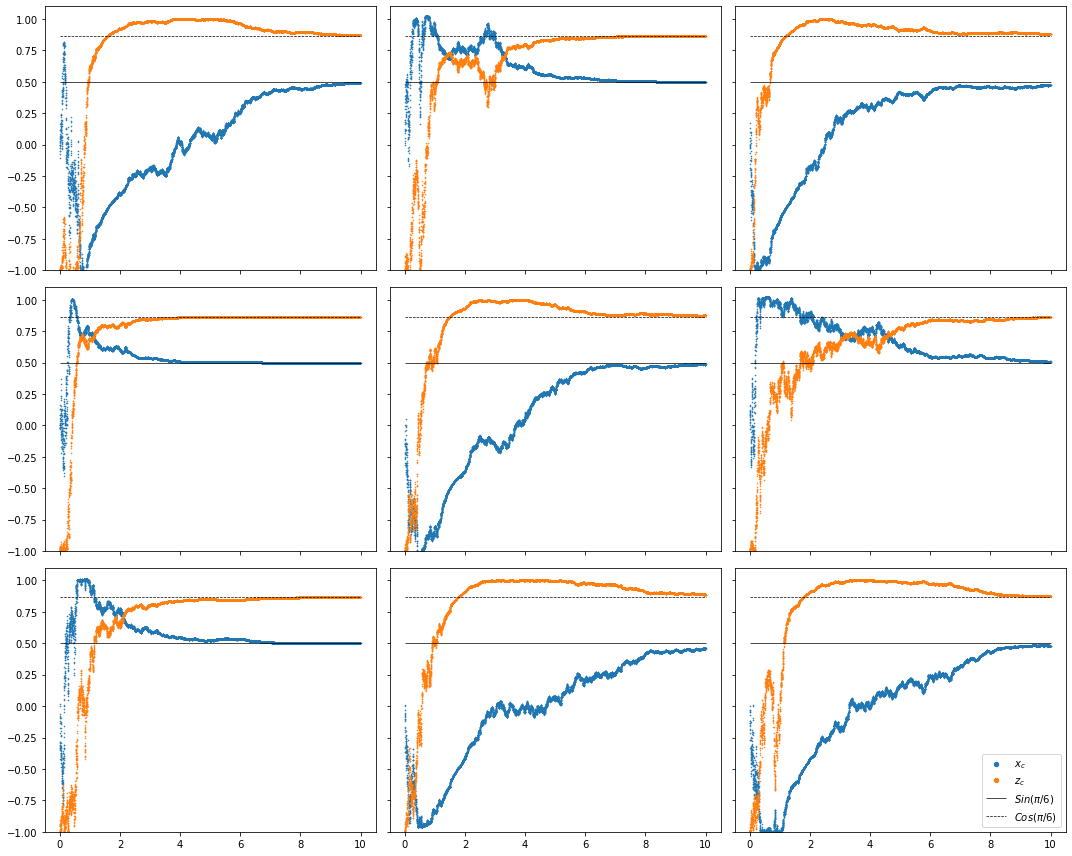

In [15]:
# Plotting
n=3
fig, ax = plt.subplots(nrows = n, ncols = n, sharex=True, sharey=True, figsize=(5*n,4*n))
for i in range(n):
  for j in range(n):
    # simulate state
    state = simulate(Alpha, Lambda, time=time) 
    # Plotting
    ax[i,j].scatter(time, state[:, 0,0],s=.3, label = '$x_c$')
    ax[i,j].scatter(time, state[:, 2,0],s=.3, label = '$z_c$')
    ax[i,j].hlines(np.sin(theta_0),0,time.max(), linewidth = .7, label = '$Sin(\pi/6)$')
    ax[i,j].hlines(np.cos(theta_0),0,time.max(), linewidth = .7, linestyles='dashed', label = '$Cos(\pi/6)$')
    ax[i,j].set_ylim([-1,1.1])

ax[i,j].legend(loc = 'lower right', markerscale = 8)
plt.tight_layout()
plt.show()

Now for the case where we drive to $θ=\pi/2$ and still starting in the ground state

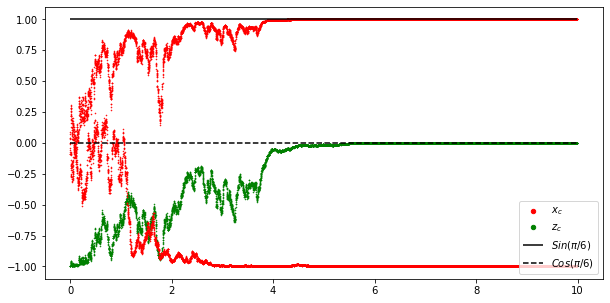

In [16]:
# Initialising
theta_opt = np.pi/2
Lambda = lambda_opt_unit(Gamma, theta_opt) # Optimum feedback
Alpha  = alpha_opt_unit(Gamma, theta_opt)  # Optimum driving
# Keeping track of weather the +-X states have been reached 
truth_plus, truth_minus = False, False

plt.figure(figsize=(10,5))
while True:  
  state = simulate(Alpha, Lambda, time=time) 

  # Check if X-state has reached ~ 1
  if state[-1,0,0]>.95 and not truth_plus:
    plt.scatter(time, state[:, 0,0],s=.3, c='r', label = '$x_c$' )
    plt.scatter(time, state[:, 2,0],s=.3, c='g', label = '$z_c$')
    truth_plus = True
  
  # Check if X-state has reached ~ -1
  if state[-1,0,0]<-0.95 and not truth_minus:
    plt.scatter(time, state[:, 0,0],s=.3, c='r' )
    truth_minus = True
  # Check if our work is done ie: X-state has reached +-1
  if truth_plus and truth_minus: break

plt.hlines(np.sin(theta_opt),0,time.max(), label = '$Sin(\pi/6)$')
plt.hlines(np.cos(theta_opt),0,time.max(), linestyles='dashed', label = '$Cos(\pi/6)$')
plt.legend(loc = 'lower right', markerscale = 8); plt.show()

## $η\neq 1$ 

In [ ]:
#@title

####################################
# STEADY STATE SOLUTION PARAMETERS #
####################################
def D(Gamma, Lambda, Eta, Theta): 
  s1 = Gamma**2*Eta**2 
  s2 = 6*Gamma**(1.5)*Eta**2*Lambda
  s3 = 2*Gamma*Eta*(3 + 4*Eta)*Lambda**2
  s4 = 16*np.sqrt(Gamma)*Eta*Lambda**3
  s5 = 8*( (alpha(Gamma, Lambda, Eta, Theta))**2*Eta**2 + Lambda**4)
  return s1+s2+s3+s4+s5

def alpha(Gamma, Lambda, Eta, Theta): 
  n = np.tan(Theta)*np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda + 4*Lambda**2)
  d = 4*Eta**2*(Gamma + 2*Gamma**.5*Lambda)
  return n/d

def xss(Gamma, Lambda, Eta, Theta): 
  n = -4*alpha(Gamma, Lambda, Eta, Theta)*Eta**2*(Gamma + 2*np.sqrt(Gamma)*Lambda)
  d = D(Gamma, Lambda, Eta, Theta)
  return n/d

def zss(Gamma, Lambda, Eta, Theta): 
  n = -np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda +4*Lambda**2)
  d = D(Gamma, Lambda, Eta, Theta)
  return n/d

def purity(Gamma, Lambda, Eta, Theta): 
  return xss(Gamma, Lambda, Eta, Theta)**2+zss(Gamma, Lambda, Eta, Theta)**2

###########################################
#BLOCH EQUATIONS FOR STOCHASTIC SIMULATION#
###########################################

# Stochastic Bloch equations Eq. 5.2
def Kappa(Lambda, Eta=1, Gamma = 1): 
  return Lambda**2/Eta + Lambda*(Gamma**.5)

# Deterministic part of the stochastic DE to be solved
def a(v, Alpha, Lambda, Eta = 1., Gamma = 1.):
  k = Kappa(Lambda, Eta, Gamma)
  matrix = np.array([[-Gamma/2.-2.*k, 0, 2.*Alpha],
                     [0, -2.*Gamma/2., 0],
                     [-2.*Alpha, 0, -Gamma-2.*k]])
  
  vector = np.array([[0],[0],[2*Lambda*Gamma**.5 + Gamma]])
  return matrix@v - vector

# Stochastic part of the stochastic DE to be solved
def b(v, Alpha, Lambda, Eta = 1., Gamma = 1.):
  x,y,z = v[0,0],v[1,0],v[2,0]
  gn = (Gamma*Eta)**.5
  return np.array([[-gn*x**2 + (gn + 2*Lambda/(Eta**.5) )*z + gn],
                   [-gn*x*y],
                   [-(gn + 2*Lambda/(Eta**.5) )*x - gn*x*z]])
  
# Euler–Maruyama method for solving SDE
def simulate(Alpha, Lambda, Eta=1., Gamma=1., time=np.arange(0,10,.01), initial_state = np.array([[0],[0],[-1]])):
  state = np.zeros((time.size, 3, 1)) # (x,y,z)-State at time t
  state[0] = initial_state # Initialising with initial state (GS)

  dt = time[1]-time[0]
  for i,t in enumerate(time[:-1]):
    dWt = np.sqrt(dt)*np.random.normal(0,1) # Random Wiener process
    A = a(state[i], Alpha, Lambda, Eta, Gamma)
    B = b(state[i], Alpha, Lambda, Eta, Gamma)
    state[i+1] = state[i] + dt*A + dWt*B
  return state # Return a state

####################################
#   OPTIMUM DRIVING FUNCTIONS      #
####################################

# Optimum feedback and driving parameters for unit detection efficency
def lambda_opt_unit(Gamma, Theta):
  return -Gamma**.5/2*(1+np.cos(Theta))

def alpha_opt_unit(Gamma, Theta):
  return Gamma/4*(np.cos(Theta)*np.sin(Theta))

# Optimum feedback and driving parameters for nonunit detection efficency
def lambda_opt(Gamma, Eta, Theta, lambda_range = np.arange(-1,1,.001) ):
  ''' 
  This function finds the optimum feedback value in lambda_range.
  This corrosponds to maximising the purity wrt lambda. There is
  need to split the search into the upper (-pi/2<theta<pi/2) and 
  lower halves as the top solutions are missing if that step is 
  missed.
  '''
  
  # Handling the expetion theta=float
  Float = True if type(Theta) == float else False
  Theta = np.array([Theta]) if Float else Theta
  # Array to store optimal lambda for each theta
  Lambdas = np.zeros_like(Theta) 

  # Looping over theta
  for i, theta in enumerate(Theta):
    # Solutions X and Z over a range of Lambda for single theta value
    X = xss(Gamma, lambda_range, Eta, theta) 
    Z = zss(Gamma, lambda_range, Eta, theta) 

    # Considering Z>0 (Upper half bloch sphere)
    if (-np.pi/2 < theta and theta <= np.pi/2): 
      # Return lambda which maximises the purity
      Z_up = np.array([z if z>0 else 0 for z in Z ])
      X_up = np.array([X[i] if z>0 else 0 for i, z in enumerate(Z)])
      Lambdas[i] = lambda_range[ np.argmax(X_up**2+Z_up**2) ] 

    # Considering Z<0 (Lower half)
    else:
      Lambdas[i] = lambda_range[ np.argmax(X**2+Z**2) ] 

  return np.sum(Lambdas) if Float else Lambdas

# Functions defined by Eqs. 4.7, 4.5, 4.6 and 4.8
def alpha_opt(Gamma, Lambda, Eta, Theta): 
  n = np.tan(Theta)*np.sqrt(Gamma)*Eta*(np.sqrt(Gamma) + 2*Lambda)*(Gamma*Eta + 4*np.sqrt(Gamma)*Eta*Lambda + 4*Lambda**2)
  d = 4*Eta**2*(Gamma + 2*Gamma**.5*Lambda)
  return n/d

Typical quantum trajectories in Bloch space for $t\in [0,10\gamma^{-1}]$ under optimal feedback for $\pi/6$, starting at the ground state. The pluses are for $\eta=1$ and the dots for $\eta = 0.8$. The locus for the deterministic stationary states for $\eta = 0.8$ are also shown; the relevant state for this quantum trajectory is at the intersection of the locus and the ray at $\pi/6$. Note that the quantum trajectory for $\eta = 0.8$ wanders around this average position, while that for $\eta = 1$ stops precisely at the desired pure steady state.

In [ ]:
Theta = np.pi/6 # Stabilisation Angle
dt    = 1e-4
time  = np.arange(0,10,dt)
Eta   = .8 
Gamma = 1.

# eta= .8 optimal parameters
Lambda_nonunit = lambda_opt(Gamma, Eta, Theta)
Alpha_nonunit  = alpha_opt(Gamma, Lambda_nonunit, Eta, Theta)
# eta = 1 optimal parameters
Lambda_unit    = lambda_opt_unit(Gamma, Theta)
Alpha_unit     = alpha_opt_unit(Gamma, Theta)

# For plotting eta=.8 SS optimal solution (As in earlier section)
theta_range = np.arange(-np.pi,np.pi,np.pi/100)
lambda_nonunit_rng = lambda_opt(Gamma, Eta, theta_range)
x_plot = xss(Gamma, lambda_nonunit_rng, Eta, theta_range)
z_plot = zss(Gamma, lambda_nonunit_rng, Eta, theta_range)

In [ ]:
n = 2 # number of simulations

# Saving states for animation/plotting
anim_state_unit  = np.zeros((n*n, 2, time.size))
anim_state_nunit = np.zeros((n*n, 2, time.size))

for i in range(n*n):
  # Sim states for (non)unit parameters
  state_nunit = simulate(Alpha_nonunit, Lambda_nonunit, Eta, time = time)
  state_unit  = simulate(Alpha_unit, Lambda_unit, time = time)

  # Saving states
  anim_state_unit[i]  = np.array([state_unit[:,0].flatten(), state_unit[:,2].flatten()])
  anim_state_nunit[i] = np.array([state_nunit[:,0].flatten(), state_nunit[:,2].flatten()])

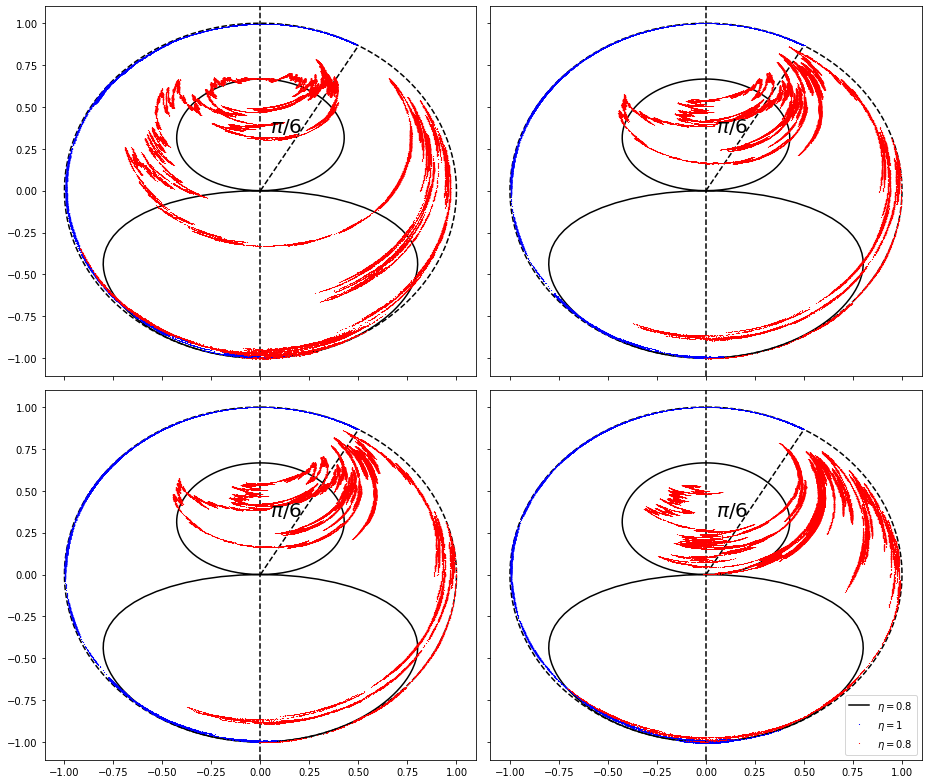

In [ ]:
fig, ax = plt.subplots(nrows = n, ncols = n, sharex=True, sharey=True,figsize=(6.5*n,5.5*n))
ms=.3
for i in range(n):
  for j in range(n):    
    #############################
    # Plotting
    #############################
    ax[i,j].plot(np.sin(theta_range), np.cos(theta_range), 'k--') # bloch sphere
    ax[i,j].axvline(x=0, color = 'k', linestyle = '--' )
    ax[i,j].plot([0,np.sin(Theta)], [0,np.cos(Theta)], 'k--')
    ax[i,j].text(.05, .35,'$\pi/6$', fontdict={'size':20})
    ax[i,j].plot(x_plot, z_plot,'k-', label= '$\eta=0.8$' ) # SS solution
    #############################
    x_unit , z_unit  = anim_state_unit[i+j, 0],  anim_state_unit[i+j,1] 
    x_nunit, z_nunit = anim_state_nunit[i+j, 0], anim_state_nunit[i+j,1]
    ax[i,j].plot(x_unit,   z_unit, 'bd', ms = ms, label = '$\eta=1$'  )
    ax[i,j].plot(x_nunit, z_nunit, 'rd', ms = ms, label = '$\eta=0.8$')

plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

#### Animation

In [ ]:
%matplotlib inline
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,9))
#############################
# Plotting
#############################
plt.plot(np.sin(theta_range), np.cos(theta_range), 'k--') # bloch sphere
plt.axvline(x=0, color = 'k', linestyle = '--' )
plt.plot([0,np.sin(Theta)], [0,np.cos(Theta)], 'k--')
plt.text(.05, .35,'$\pi/6$', fontdict={'size':20})
plt.plot(x_plot, z_plot,'k-', label= '$\eta=0.8$ SS solution' ) # SS solution
plt.xlim((-1.1,1.1))
plt.ylim((-1.1,1.1))
##############################
ms=.5
unit,  = ax.plot([], [],  'bd', ms = ms, label = '$\eta=1$'  )
nunit, = ax.plot([], [], 'rd', ms = ms, label = '$\eta=0.8$')

xunit  =  anim_state_unit[0,0,::10]
zunit  =  anim_state_unit[0,1,::10]
xnunit = anim_state_nunit[0,0,::10]
znunit = anim_state_nunit[0,1,::10]

lenght = 100
def animate(i):
    ## plot line
    #if i < lenght:
    #    unit.set_data((xunit[:i], zunit[:i]))
    #    nunit.set_data((xnunit[:i], znunit[:i]))
    #else:
    #    unit.set_data((xunit[i-lenght:i], zunit[i-lenght:i]))
    #    nunit.set_data((xnunit[i-lenght:i], znunit[i-lenght:i]))    
    #return nunit, unit
    unit.set_data((xunit[:i], zunit[:i]))
    nunit.set_data((xnunit[:i], znunit[:i]))    
    return nunit, unit

plt.legend(loc = 'upper left', markerscale=5)
plt.tight_layout()
ani = animation.FuncAnimation(fig=fig, func = animate, frames=xunit.size, interval=3, blit=True)

In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,9))
#############################
# Plotting
#############################
plt.plot(np.sin(theta_range), np.cos(theta_range), 'k--') # bloch sphere
plt.axvline(x=0, color = 'k', linestyle = '--' )
plt.plot([0,np.sin(Theta)], [0,np.cos(Theta)], 'k--')
plt.text(.05, .35,'$\pi/6$', fontdict={'size':20})
plt.plot(x_plot, z_plot,'k-', label= '$\eta=0.8$ SS solution' ) # SS solution
plt.xlim((-1.1,1.1))
plt.ylim((-1.1,1.1))
##############################

ms=.5
d = .05

ax.set(xlim = (-1.1,1.1), ylim = (-1.1,1.1))
unit  = ax.arrow(0,0,0,-1,
                head_width = d, head_length = d, 
                length_includes_head=True, fc = 'blue', ec = 'blue')

nunit = ax.arrow(0,0,0,-1,
                 head_width = d, head_length = d, 
                 length_includes_head=True, fc = 'red', ec = 'red')

xunit  =  anim_state_unit[0,0,::10]
zunit  =  anim_state_unit[0,1,::10]
xnunit = anim_state_nunit[0,0,::10]
znunit = anim_state_nunit[0,1,::10]


def animate(i):
    ax.cla()
    #############################
    # Plotting pretty stuff
    #############################
    ax.plot(np.sin(theta_range), np.cos(theta_range), 'k--') # bloch sphere
    ax.axvline(x=0, color = 'k', linestyle = '--' )
    ax.plot([0,np.sin(Theta)], [0,np.cos(Theta)], 'k--')
    ax.text(.05, .35,'$\pi/6$', fontdict={'size':20})
    ss_sol, = ax.plot(x_plot, z_plot,'k-' ) # SS solution
    ##############################
    ax.arrow(0, 0, xunit[i], zunit[i],
             head_width = d, head_length = d, length_includes_head=True, fc = 'blue', ec = 'blue')
    ax.arrow(0, 0, xnunit[i], znunit[i],
             head_width = d, head_length = d, length_includes_head=True, fc = 'red', ec = 'red')
    #ax.legend([ss_sol,unit,nunit], 
    #          ['$\eta=0.8$ SS solution','$\eta=1$','$\eta=0.8$'], 
    #          loc = 'upper left')
    fig.tight_layout()
    ax.set(xlim = (-1.1,1.1), ylim = (-1.1,1.1))
    return nunit, unit

ani = animation.FuncAnimation(fig=fig, func = animate, frames=xunit.size, interval=3, blit=True)

In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())